In [ ]:
#Alexnet model 구현
#프레임워크로는 alexnet model 구현했습니다

In [1]:
#필요한 라이브러리 import
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import ZeroPadding2D


Using TensorFlow backend.


In [2]:
model = Sequential()

#layer 1: convolution_layer
model.add(Conv2D(96, (11,11), strides=4, input_shape=(227,227,3), activation='relu')) #activation function도 추가했습니다
#Input Image size 227 x 227 x 3
#Number of filters 96
#Filter size 11 x 11 x 3
#Stride 4

#layer 2 : Max_pooling_1
model.add(MaxPooling2D(pool_size=(3,3),strides=2))
#Pooling size(overlapping) 3 x 3
#Stride 2

model.add(BatchNormalization()) #지난 강의때 배웠던 batchnormalization도 추가했습니다

#layer3: Convolution layer_2
model.add(ZeroPadding2D(2))
model.add(Conv2D(256,(5,5), strides=1, activation='relu'))
#Number of filters 256
#Filter size 5 x 5 x 96
#Stride 1
#padding 2
#이 때 zeropadding을 하는 이유는, 컨볼루션으로 인해 특성맵의 사이즈가 축소되는 것을 방지하기 위해,
#또는 축소되는 정도를 줄이기 위해 영상의 가장자리 부분에 0을 추가하는 것임!

#layer4: Max_Pooling_2
model.add(MaxPooling2D(pool_size=(3,3),strides=2))
#Pooling size(overlapping) 3 x 3
#Stride 2

model.add(BatchNormalization()) #Batchnormalization


#layer5: Convolution layer_3
model.add(ZeroPadding2D(1))
model.add(Conv2D(384,(3,3), strides=1, activation='relu'))
#Number of filters 384
#Filter size 3 x 3 x 256 
#Stride 1
#padding 1


#layer6: Convolution layer_4
model.add(ZeroPadding2D(1))
model.add(Conv2D(384,(3,3), strides=1, activation='relu'))
#Number of filters 384
#Filter size 3 x 3 x 384
#Stride 1
#padding 1


#layer7: Convolution layer_5
model.add(ZeroPadding2D(1))
model.add(Conv2D(256,(3,3), strides=1, activation='relu'))
#Number of filters 256
#Filter size 3 x 3 x 384
#Stride 1
#padding 1

#layer8: Max Pooling_3
model.add(MaxPooling2D(pool_size=(3,3), strides=2))
#Pooling size(overlapping) 3 x 3
#Stride 2


#계산을 위해서 1차원 배열로 전환
model.add(Flatten())
#input 6 x 6 x 256
#flatten 9216


#layer9: Fully_connected_layer_1
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5)) #저번시간에 배웠던 dropout도 추가해보았습니다
#(N,flatten) x (flatten,4096) -> (N,4096) (N=number of input data)

#layer 10: Fully_connected_layer_2
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
#output size (N,4096) x (4096,4096) -> (N,4096)

#layer11: Fully_connected_layer_3
model.add(Dense(1000, activation='sigmoid'))
#output size (N,4096) x (4096,Num_classes) ->(N,1000)


In [3]:
model.summary() #모델 구현 후 summary

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 31, 31, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 13, 13, 256)      

conv2d_1 (Conv2D)
->max_pooling2d_1 
->batch_normalization_1 
->zero_padding2d_1
->conv2d_2 (Conv2D) 
->max_pooling2d_2 
->batch_normalization_2 
->zero_padding2d_2 
->conv2d_3 (Conv2D)
->zero_padding2d_3
->conv2d_4 (Conv2D)
->zero_padding2d_4 (ZeroPaddin 
->conv2d_5 (Conv2D) 
->max_pooling2d_3
->flatten_1 (Flatten)
->dense_1 (Dense) 
->dropout_1 (Dropout)  
->dense_2 (Dense) 
->dropout_2 (Dropout) 
->dense_3 (Dense)  의 순서로 진행되고 있으며, 총 parameter수는  62,379,752
입니다

약 6천만개의 파라미터가 훈련되어야 함도 알 수 있음

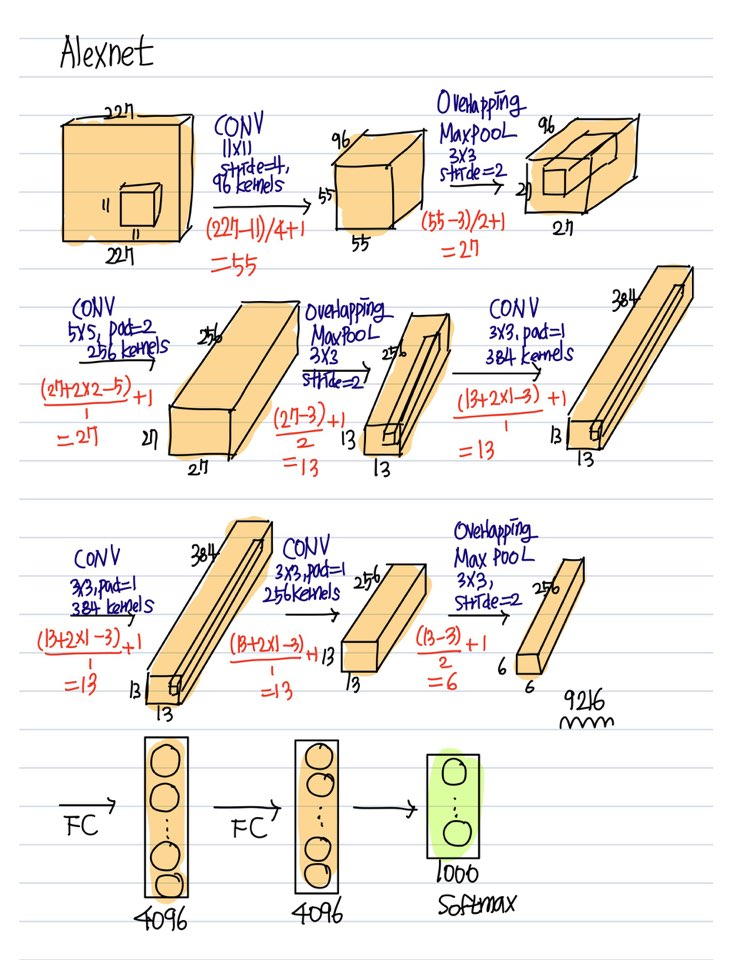

In [4]:
from IPython.display import Image
 
Image("image1.jpg") #이러한 구조로 흘러가고 있음을 알수 있음 
#앞서 과제1번에서 공부했던 이미지 함께 첨부합니다